In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from datetime import datetime
import os
import warnings
warnings.filterwarnings('ignore')

# Visualization configuration (EDA.py ile aynı)
plt.rcParams['font.family'] = 'DejaVu Sans'
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['figure.dpi'] = 100
sns.set_style("whitegrid")


In [2]:
print("="*80)
print("EXPLORATORY DATA ANALYSIS: TRAFFIC & AIR QUALITY")
print("="*80)
print(f"Student ID: 30815")
print(f"Analysis Date: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}\n")


EXPLORATORY DATA ANALYSIS: TRAFFIC & AIR QUALITY
Student ID: 30815
Analysis Date: 2026-01-01 19:07:54



In [3]:
# DATA LOADING CELL

import os

# Dataset path
csv_path = "MASTER_enriched_data.csv"

# Visualization output directory
vis_dir = "visualizations_eda"
os.makedirs(vis_dir, exist_ok=True)

# Load data
df = pd.read_csv(csv_path)
df['datetime'] = pd.to_datetime(df['datetime'])
df = df.sort_values('datetime').reset_index(drop=True)

print("Dataset loaded")
print(df.shape)
print("Visualization directory:", vis_dir)


Dataset loaded
(8027, 52)
Visualization directory: visualizations_eda


In [4]:
# =============================================================================
# SECTION 1: DATASET CHARACTERISTICS
# =============================================================================

print("="*80)
print("SECTION 1: DATASET CHARACTERISTICS")
print("="*80)

print(f"\nDimensions:")
print(f"  Rows (observations): {len(df):,}")
print(f"  Columns (variables): {len(df.columns)}")
print(f"  Time period: {df['datetime'].min().date()} to {df['datetime'].max().date()}")
print(f"  Sampling frequency: Hourly")

print(f"\nVariable Types:")
print(df.dtypes.value_counts())

print(f"\nFirst few rows:")
print(df.head())

print(f"\nBasic statistics:")
print(df.describe())


SECTION 1: DATASET CHARACTERISTICS

Dimensions:
  Rows (observations): 8,027
  Columns (variables): 52
  Time period: 2024-01-01 to 2024-12-31
  Sampling frequency: Hourly

Variable Types:
float64           23
object            15
int64             13
datetime64[ns]     1
Name: count, dtype: int64

First few rows:
    LATITUDE  LONGITUDE GEOHASH  MINIMUM_SPEED  MAXIMUM_SPEED  AVERAGE_SPEED  \
0  40.992737  29.075317  sxk9jw              5            135             55   
1  40.992737  29.075317  sxk9jw              3            130             61   
2  40.992737  29.075317  sxk9jw              6            143             64   
3  40.992737  29.075317  sxk9jw              5            147             67   
4  40.992737  29.075317  sxk9jw             13            153             73   

   NUMBER_OF_VEHICLES            datetime  Concentration_SO2  \
0                 227 2024-01-01 00:00:00                NaN   
1                 206 2024-01-01 01:00:00                NaN   
2          

In [5]:
# =============================================================================
# SECTION 2: MISSING DATA ANALYSIS
# =============================================================================

print("\n" + "="*80)
print("SECTION 2: MISSING DATA ANALYSIS")
print("="*80)

missing = df.isnull().sum()
missing_pct = (missing / len(df)) * 100
missing_df = pd.DataFrame({
    'Missing_Count': missing, 
    'Percentage': missing_pct
})
missing_df = missing_df[missing_df['Missing_Count'] > 0].sort_values('Percentage', ascending=False)

if len(missing_df) > 0:
    print(f"\nVariables with missing data:")
    print(missing_df.head(10).to_string())
else:
    print("\n  No missing values detected")



SECTION 2: MISSING DATA ANALYSIS

Variables with missing data:
                   Missing_Count  Percentage
Concentration_SO2           8027  100.000000
AQI_O3                      8027  100.000000
Concentration               8027  100.000000
Concentration_O3            8027  100.000000
AQI_SO2                     8027  100.000000
AQI_PM10                     392    4.883518
no2_lag3                     141    1.756572
no2_lag2                     140    1.744114
no2_lag1                     139    1.731656
AQI_NO2                      138    1.719198


In [6]:
# =============================================================================
# SECTION 3: TRAFFIC STATISTICS
# =============================================================================

print("\n" + "="*80)
print("SECTION 3: TRAFFIC FLOW STATISTICS")
print("="*80)

if 'NUMBER_OF_VEHICLES' in df.columns:
    print(f"\nVehicle Count (hourly):")
    print(f"  Mean: {df['NUMBER_OF_VEHICLES'].mean():.1f} vehicles/hour")
    print(f"  Median: {df['NUMBER_OF_VEHICLES'].median():.1f}")
    print(f"  Std Dev: {df['NUMBER_OF_VEHICLES'].std():.1f}")
    print(f"  Min: {df['NUMBER_OF_VEHICLES'].min():.0f}")
    print(f"  Max: {df['NUMBER_OF_VEHICLES'].max():.0f}")
    print(f"  Q1 (25%): {df['NUMBER_OF_VEHICLES'].quantile(0.25):.1f}")
    print(f"  Q3 (75%): {df['NUMBER_OF_VEHICLES'].quantile(0.75):.1f}")

if 'AVERAGE_SPEED' in df.columns:
    print(f"\nAverage Speed:")
    print(f"  Mean: {df['AVERAGE_SPEED'].mean():.1f} km/h")
    print(f"  Median: {df['AVERAGE_SPEED'].median():.1f} km/h")
    print(f"  Std Dev: {df['AVERAGE_SPEED'].std():.1f} km/h")
    print(f"  Min: {df['AVERAGE_SPEED'].min():.1f} km/h")
    print(f"  Max: {df['AVERAGE_SPEED'].max():.1f} km/h")

if 'traffic_density' in df.columns:
    print(f"\nTraffic Density:")
    print(f"  Mean: {df['traffic_density'].mean():.2f}")
    print(f"  Median: {df['traffic_density'].median():.2f}")
    print(f"  Std Dev: {df['traffic_density'].std():.2f}")



SECTION 3: TRAFFIC FLOW STATISTICS

Vehicle Count (hourly):
  Mean: 373.5 vehicles/hour
  Median: 344.0
  Std Dev: 216.4
  Min: 1
  Max: 1169
  Q1 (25%): 206.0
  Q3 (75%): 535.0

Average Speed:
  Mean: 46.4 km/h
  Median: 50.0 km/h
  Std Dev: 15.6 km/h
  Min: 4.0 km/h
  Max: 80.0 km/h

Traffic Density:
  Mean: 10.42
  Median: 7.57
  Std Dev: 8.68


In [7]:
# =============================================================================
# SECTION 4: AIR QUALITY STATISTICS
# =============================================================================

print("\n" + "="*80)
print("SECTION 4: AIR QUALITY STATISTICS")
print("="*80)

if 'Concentration_NO2' in df.columns:
    print(f"\nNO2 Concentration (µg/m³):")
    print(f"  Mean: {df['Concentration_NO2'].mean():.2f}")
    print(f"  Median: {df['Concentration_NO2'].median():.2f}")
    print(f"  Std Dev: {df['Concentration_NO2'].std():.2f}")
    print(f"  Min: {df['Concentration_NO2'].min():.2f}")
    print(f"  Max: {df['Concentration_NO2'].max():.2f}")

if 'AQI_PM10' in df.columns:
    print(f"\nPM10 AQI:")
    print(f"  Mean: {df['AQI_PM10'].mean():.2f}")
    print(f"  Median: {df['AQI_PM10'].median():.2f}")
    print(f"  Max: {df['AQI_PM10'].max():.2f}")

if 'Concentration_CO' in df.columns:
    print(f"\nCO Concentration:")
    print(f"  Mean: {df['Concentration_CO'].mean():.2f}")
    print(f"  Median: {df['Concentration_CO'].median():.2f}")


SECTION 4: AIR QUALITY STATISTICS

NO2 Concentration (µg/m³):
  Mean: 60.42
  Median: 55.70
  Std Dev: 27.23
  Min: 7.10
  Max: 302.10

PM10 AQI:
  Mean: 66.97
  Median: 55.00
  Max: 305.00

CO Concentration:
  Mean: 985.28
  Median: 872.60


In [8]:
# =============================================================================
# SECTION 5: TEMPORAL PATTERNS
# =============================================================================

print("\n" + "="*80)
print("SECTION 5: TEMPORAL PATTERNS")
print("="*80)

# Weekday vs Weekend
if 'is_weekend' in df.columns:
    weekday = df[df['is_weekend'] == 0]
    weekend = df[df['is_weekend'] == 1]
    
    print(f"\nWeekday vs Weekend Distribution:")
    print(f"  Weekdays: {len(weekday):,} observations ({len(weekday)/len(df)*100:.1f}%)")
    print(f"  Weekends: {len(weekend):,} observations ({len(weekend)/len(df)*100:.1f}%)")
    
    if 'NUMBER_OF_VEHICLES' in df.columns:
        print(f"\nTraffic Comparison:")
        print(f"  Weekday avg: {weekday['NUMBER_OF_VEHICLES'].mean():.1f} vehicles")
        print(f"  Weekend avg: {weekend['NUMBER_OF_VEHICLES'].mean():.1f} vehicles")
        diff = ((weekend['NUMBER_OF_VEHICLES'].mean() - weekday['NUMBER_OF_VEHICLES'].mean()) / 
                weekday['NUMBER_OF_VEHICLES'].mean() * 100)
        print(f"  Difference: {diff:+.1f}%")

# Special days
if 'is_special_day' in df.columns:
    special = df[df['is_special_day'] == 1]
    print(f"\nSpecial Days:")
    print(f"  Count: {len(special):,} observations")
    print(f"  Percentage: {len(special)/len(df)*100:.1f}%")

# Seasonal patterns
if 'season' in df.columns:
    print(f"\nSeasonal Distribution:")
    season_counts = df['season'].value_counts()
    for season, count in season_counts.items():
        print(f"  {season}: {count:,} observations ({count/len(df)*100:.1f}%)")


SECTION 5: TEMPORAL PATTERNS

Weekday vs Weekend Distribution:
  Weekdays: 5,735 observations (71.4%)
  Weekends: 2,292 observations (28.6%)

Traffic Comparison:
  Weekday avg: 414.8 vehicles
  Weekend avg: 270.1 vehicles
  Difference: -34.9%

Special Days:
  Count: 577 observations
  Percentage: 7.2%

Seasonal Distribution:
  Sonbahar: 2,186 observations (27.2%)
  Yaz: 2,116 observations (26.4%)
  İlkbahar: 2,112 observations (26.3%)
  Kış: 1,613 observations (20.1%)


In [9]:
# =============================================================================
# SECTION 6: CORRELATION ANALYSIS
# =============================================================================

print("\n" + "="*80)
print("SECTION 6: CORRELATION ANALYSIS")
print("="*80)

key_vars = ['NUMBER_OF_VEHICLES', 'AVERAGE_SPEED', 'traffic_density',
            'Concentration_NO2', 'AQI_PM10', 'Concentration_CO']
available_vars = [v for v in key_vars if v in df.columns]

if len(available_vars) >= 2:
    corr = df[available_vars].corr()
    print(f"\nCorrelation Matrix:")
    print(corr.round(3))
    
    print(f"\nStrong Correlations (|r| > 0.3):")
    found = False
    for i in range(len(available_vars)):
        for j in range(i+1, len(available_vars)):
            r = corr.iloc[i, j]
            if abs(r) > 0.3:
                strength = "strong" if abs(r) > 0.7 else "moderate" if abs(r) > 0.5 else "weak-moderate"
                direction = "positive" if r > 0 else "negative"
                print(f"  {available_vars[i]} ↔ {available_vars[j]}: r={r:.3f} ({strength} {direction})")
                found = True
    if not found:
        print("  No strong correlations detected (all |r| < 0.3)")


SECTION 6: CORRELATION ANALYSIS

Correlation Matrix:
                    NUMBER_OF_VEHICLES  AVERAGE_SPEED  traffic_density  \
NUMBER_OF_VEHICLES               1.000         -0.755            0.895   
AVERAGE_SPEED                   -0.755          1.000           -0.889   
traffic_density                  0.895         -0.889            1.000   
Concentration_NO2               -0.014          0.020            0.003   
AQI_PM10                         0.078         -0.069            0.092   
Concentration_CO                -0.176          0.208           -0.179   

                    Concentration_NO2  AQI_PM10  Concentration_CO  
NUMBER_OF_VEHICLES             -0.014     0.078            -0.176  
AVERAGE_SPEED                   0.020    -0.069             0.208  
traffic_density                 0.003     0.092            -0.179  
Concentration_NO2               1.000     0.191             0.501  
AQI_PM10                        0.191     1.000             0.216  
Concentration_CO   

In [10]:
# =============================================================================
# SECTION 7: CATEGORICAL VARIABLES
# =============================================================================

print("\n" + "="*80)
print("SECTION 7: CATEGORICAL VARIABLE ANALYSIS")
print("="*80)

# Vehicle category
if 'vehicle_category' in df.columns:
    print(f"\nVehicle Category Distribution:")
    vc_counts = df['vehicle_category'].value_counts()
    for cat, count in vc_counts.items():
        print(f"  {cat}: {count:,} ({count/len(df)*100:.1f}%)")
    
    if 'Concentration_NO2' in df.columns:
        print(f"\n  Mean NO2 by Vehicle Category:")
        for cat in vc_counts.index:
            mean_no2 = df[df['vehicle_category'] == cat]['Concentration_NO2'].mean()
            print(f"    {cat}: {mean_no2:.2f} µg/m³")

# Speed category
if 'speed_category' in df.columns:
    print(f"\nSpeed Category Distribution:")
    speed_counts = df['speed_category'].value_counts()
    for cat, count in speed_counts.items():
        print(f"  {cat}: {count:,} ({count/len(df)*100:.1f}%)")

# AQI Category
if 'AQI_Category' in df.columns:
    print(f"\nAQI Category Distribution:")
    aqi_counts = df['AQI_Category'].value_counts()
    for cat, count in aqi_counts.items():
        print(f"  {cat}: {count:,} ({count/len(df)*100:.1f}%)")

# Rush hour
if 'rush_hour' in df.columns:
    print(f"\nRush Hour Distribution:")
    rush_counts = df['rush_hour'].value_counts()
    for period, count in rush_counts.items():
        print(f"  {period}: {count:,} ({count/len(df)*100:.1f}%)")


SECTION 7: CATEGORICAL VARIABLE ANALYSIS

Vehicle Category Distribution:
  Az: 2,016 (25.1%)
  Yoğun: 2,006 (25.0%)
  Çok Yoğun: 2,006 (25.0%)
  Orta: 1,999 (24.9%)

  Mean NO2 by Vehicle Category:
    Az: 61.03 µg/m³
    Yoğun: 59.55 µg/m³
    Çok Yoğun: 60.16 µg/m³
    Orta: 60.97 µg/m³

Speed Category Distribution:
  Orta: 3,820 (47.6%)
  Yavaş: 2,117 (26.4%)
  Çok Yavaş: 1,971 (24.6%)
  Hızlı: 119 (1.5%)

AQI Category Distribution:
  İyi: 3,408 (42.5%)
  Orta: 3,298 (41.1%)
  Hassas İçin Kötü: 1,252 (15.6%)
  Çok Sağlıksız: 57 (0.7%)
  Veri Yok: 9 (0.1%)
  Tehlikeli: 3 (0.0%)

Rush Hour Distribution:
  Diğer Saatler: 6,028 (75.1%)
  Sabah Rush (7-9): 1,010 (12.6%)
  Akşam Rush (17-19): 989 (12.3%)


In [11]:
# =============================================================================
# SECTION 8: VISUALIZATIONS
# =============================================================================

print("\n" + "="*80)
print("SECTION 8: GENERATING VISUALIZATIONS")
print("="*80)


SECTION 8: GENERATING VISUALIZATIONS



[1/10] Time series with special day markers...


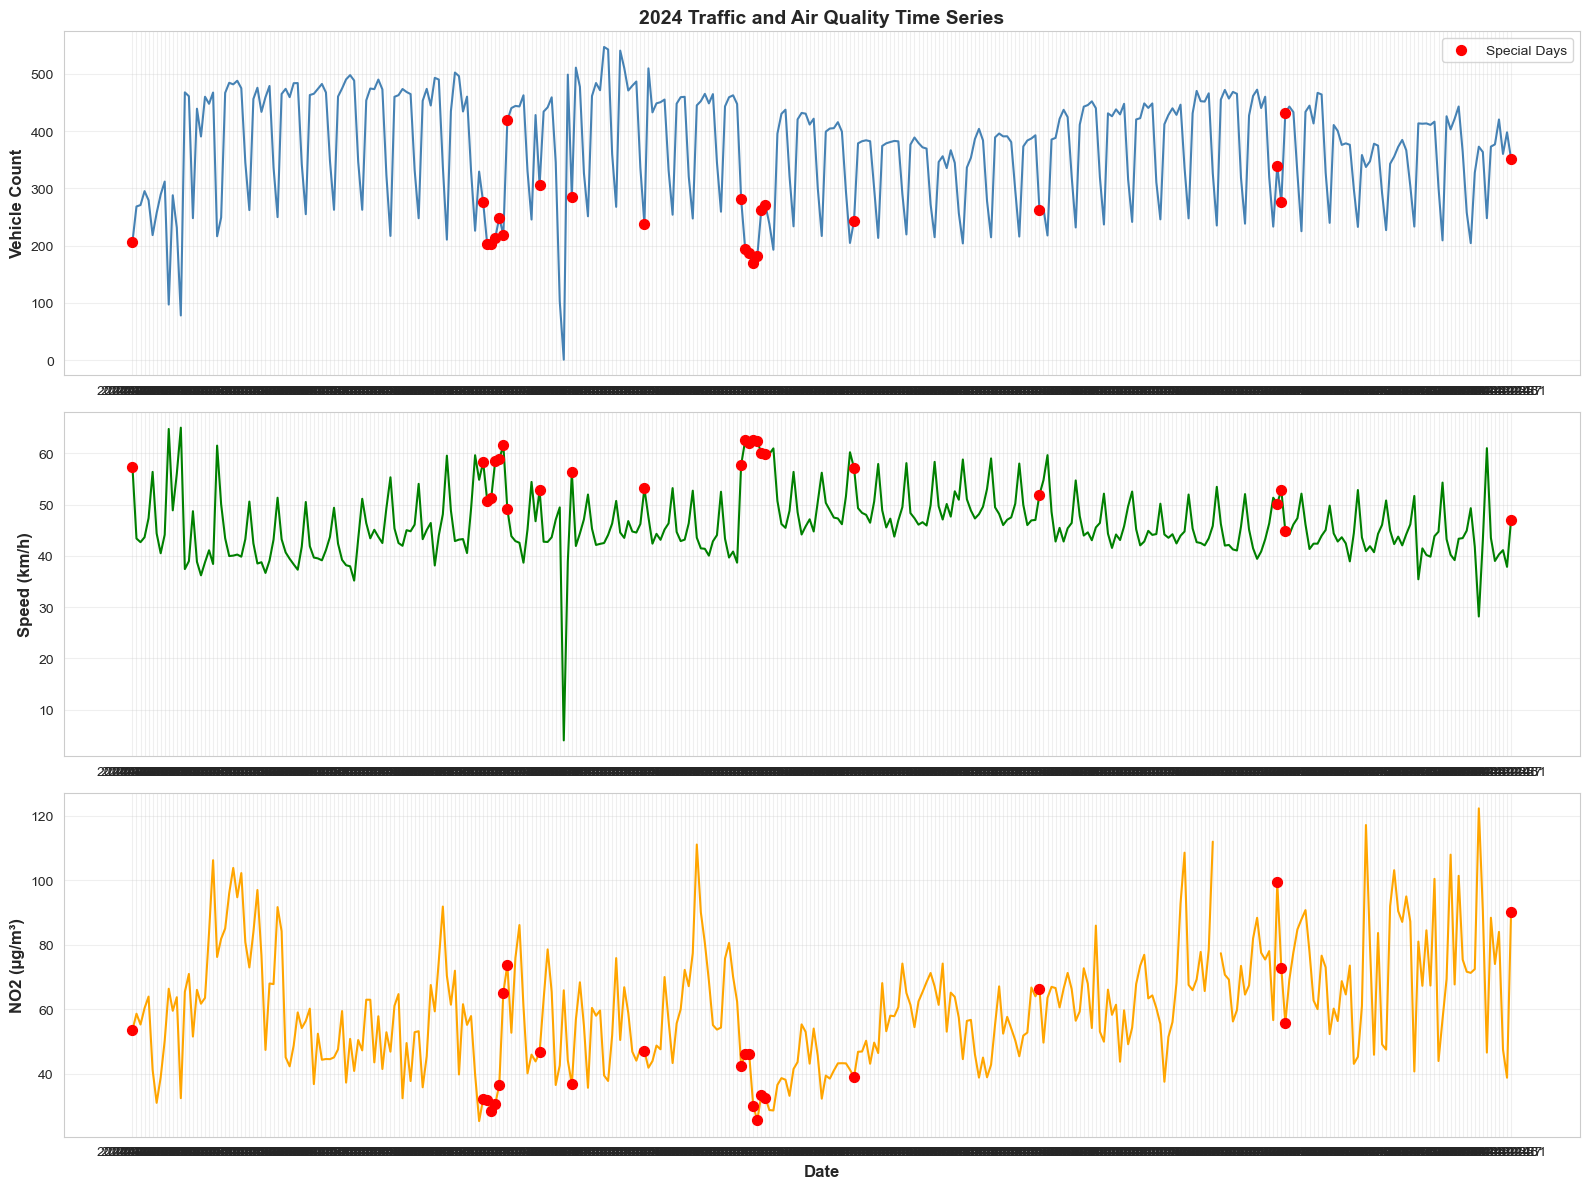

  Saved: 1_timeseries.png


In [12]:
# Visualization 1: Time series
print("\n[1/10] Time series with special day markers...")
daily = df.groupby('date').agg({
    'NUMBER_OF_VEHICLES': 'mean',
    'AVERAGE_SPEED': 'mean',
    'Concentration_NO2': 'mean',
    'is_special_day': 'max'
}).reset_index()

fig, axes = plt.subplots(3, 1, figsize=(16, 12))

axes[0].plot(daily['date'], daily['NUMBER_OF_VEHICLES'], linewidth=1.5, color='steelblue')
special_days_plot = daily[daily['is_special_day'] == 1]
axes[0].scatter(special_days_plot['date'], special_days_plot['NUMBER_OF_VEHICLES'], 
                color='red', s=50, zorder=5, label='Special Days')
axes[0].set_ylabel('Vehicle Count', fontsize=12, fontweight='bold')
axes[0].set_title('2024 Traffic and Air Quality Time Series', fontsize=14, fontweight='bold')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

axes[1].plot(daily['date'], daily['AVERAGE_SPEED'], linewidth=1.5, color='green')
axes[1].scatter(special_days_plot['date'], special_days_plot['AVERAGE_SPEED'], 
                color='red', s=50, zorder=5)
axes[1].set_ylabel('Speed (km/h)', fontsize=12, fontweight='bold')
axes[1].grid(True, alpha=0.3)

axes[2].plot(daily['date'], daily['Concentration_NO2'], linewidth=1.5, color='orange')
axes[2].scatter(special_days_plot['date'], special_days_plot['Concentration_NO2'], 
                color='red', s=50, zorder=5)
axes[2].set_ylabel('NO2 (µg/m³)', fontsize=12, fontweight='bold')
axes[2].set_xlabel('Date', fontsize=12, fontweight='bold')
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig(os.path.join(vis_dir, '1_timeseries.png'), dpi=300, bbox_inches='tight')
plt.show()
print("  Saved: 1_timeseries.png")

[2/10] Hourly traffic and pollution patterns...


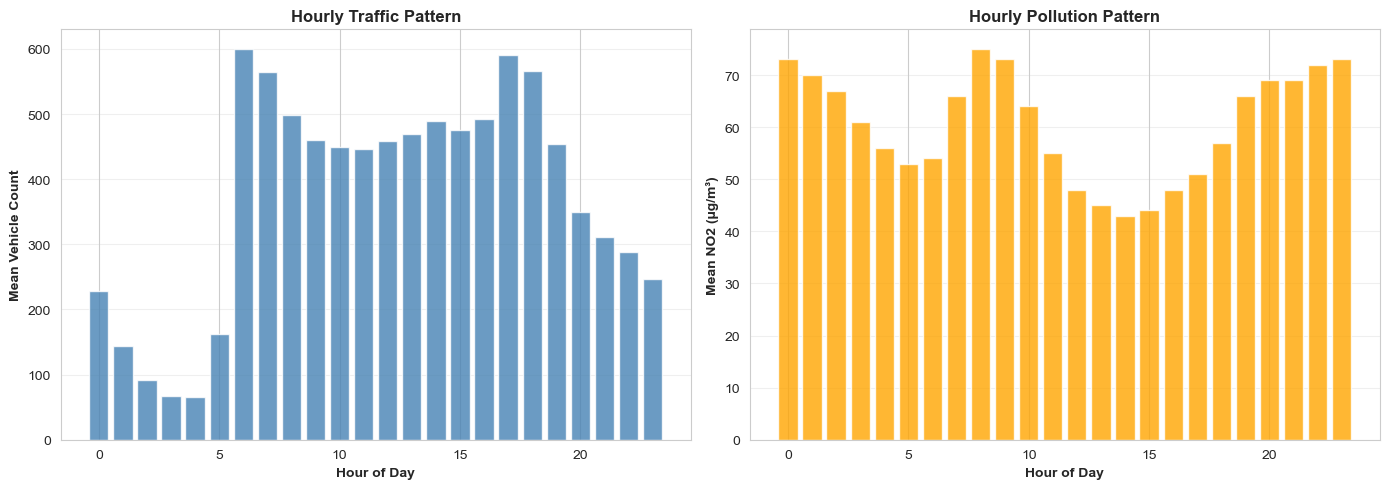

  Saved: 2_hourly_patterns.png


In [13]:
# Visualization 2: Hourly patterns
print("[2/10] Hourly traffic and pollution patterns...")
hourly = df.groupby('hour').agg({
    'NUMBER_OF_VEHICLES': 'mean',
    'Concentration_NO2': 'mean'
}).round(0)

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].bar(hourly.index, hourly['NUMBER_OF_VEHICLES'], color='steelblue', alpha=0.8)
axes[0].set_xlabel('Hour of Day', fontweight='bold')
axes[0].set_ylabel('Mean Vehicle Count', fontweight='bold')
axes[0].set_title('Hourly Traffic Pattern', fontweight='bold')
axes[0].grid(axis='y', alpha=0.3)

axes[1].bar(hourly.index, hourly['Concentration_NO2'], color='orange', alpha=0.8)
axes[1].set_xlabel('Hour of Day', fontweight='bold')
axes[1].set_ylabel('Mean NO2 (µg/m³)', fontweight='bold')
axes[1].set_title('Hourly Pollution Pattern', fontweight='bold')
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig(os.path.join(vis_dir, '2_hourly_patterns.png'), dpi=300, bbox_inches='tight')
plt.show()
print("  Saved: 2_hourly_patterns.png")

[3/10] Weekday/Weekend/Special day comparison...


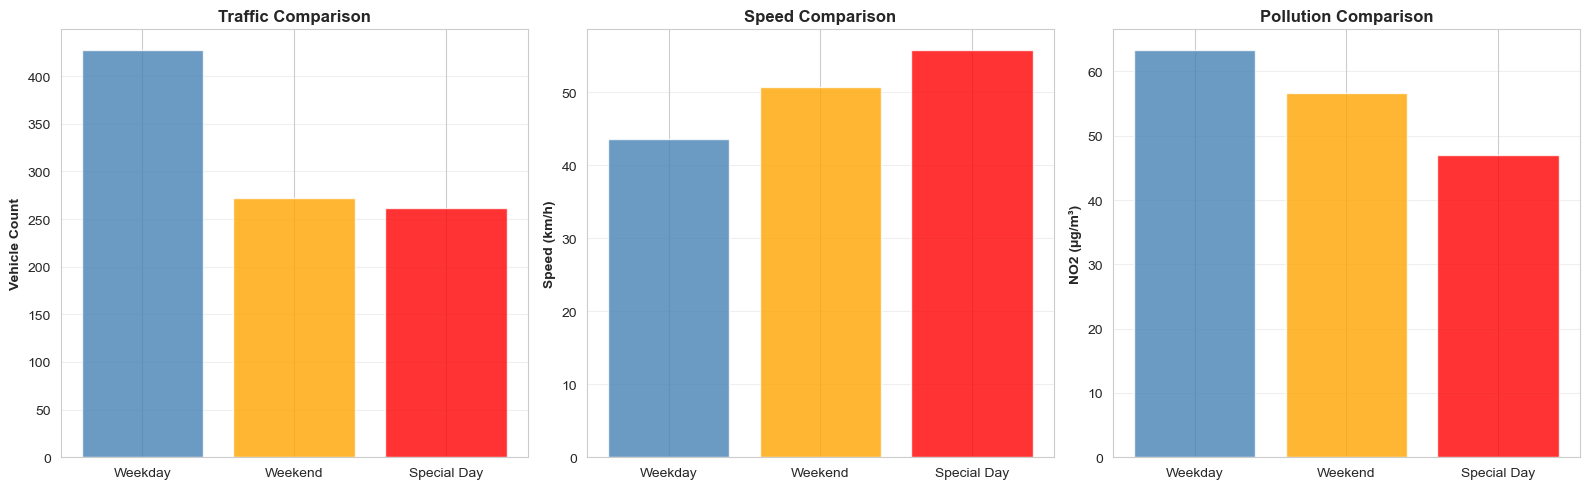

  Saved: 3_day_comparison.png


In [14]:
# Visualization 3: Day category comparison
print("[3/10] Weekday/Weekend/Special day comparison...")
categories = ['Weekday', 'Weekend', 'Special Day']
df['day_category'] = 'Weekday'
df.loc[df['is_weekend'] == 1, 'day_category'] = 'Weekend'
df.loc[df['is_special_day'] == 1, 'day_category'] = 'Special Day'

colors = ['steelblue', 'orange', 'red']

fig, axes = plt.subplots(1, 3, figsize=(16, 5))

veh_means = [df[df['day_category'] == cat]['NUMBER_OF_VEHICLES'].mean() for cat in categories]
axes[0].bar(categories, veh_means, color=colors, alpha=0.8)
axes[0].set_ylabel('Vehicle Count', fontweight='bold')
axes[0].set_title('Traffic Comparison', fontweight='bold')
axes[0].grid(axis='y', alpha=0.3)

speed_means = [df[df['day_category'] == cat]['AVERAGE_SPEED'].mean() for cat in categories]
axes[1].bar(categories, speed_means, color=colors, alpha=0.8)
axes[1].set_ylabel('Speed (km/h)', fontweight='bold')
axes[1].set_title('Speed Comparison', fontweight='bold')
axes[1].grid(axis='y', alpha=0.3)

no2_means = [df[df['day_category'] == cat]['Concentration_NO2'].mean() for cat in categories]
axes[2].bar(categories, no2_means, color=colors, alpha=0.8)
axes[2].set_ylabel('NO2 (µg/m³)', fontweight='bold')
axes[2].set_title('Pollution Comparison', fontweight='bold')
axes[2].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig(os.path.join(vis_dir, '3_day_comparison.png'), dpi=300, bbox_inches='tight')
plt.show()
print("  Saved: 3_day_comparison.png")


[4/10] Correlation heatmap...


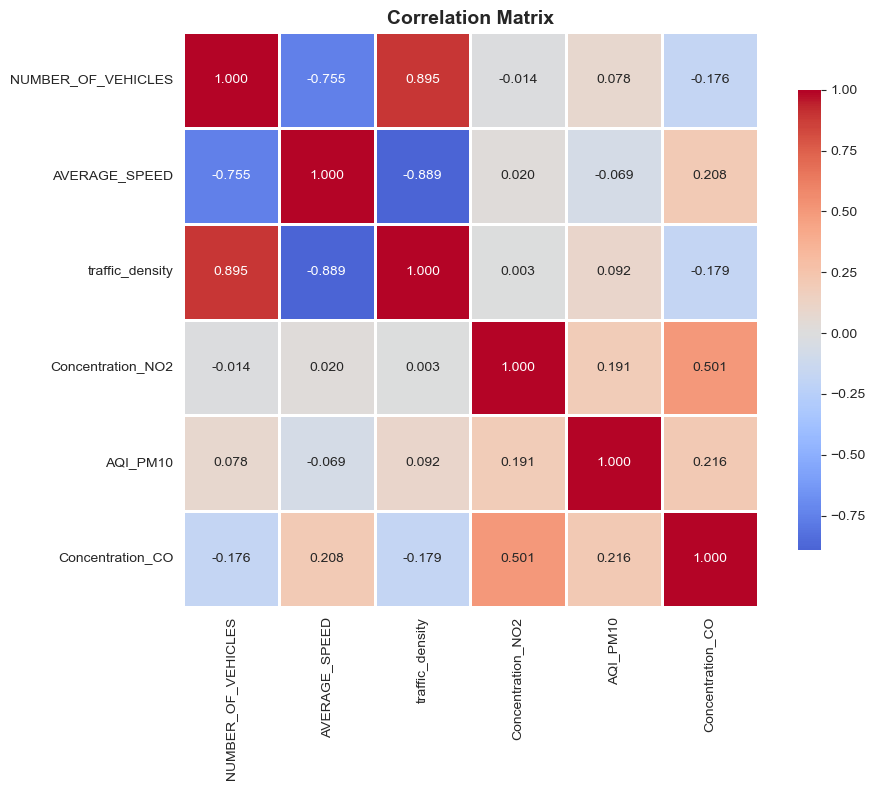

  Saved: 4_correlation_matrix.png


In [15]:
# Visualization 4: Correlation matrix
print("[4/10] Correlation heatmap...")
if len(available_vars) >= 2:
    fig, ax = plt.subplots(figsize=(10, 8))
    sns.heatmap(corr, annot=True, fmt='.3f', cmap='coolwarm', center=0,
                square=True, linewidths=1, cbar_kws={"shrink": 0.8})
    ax.set_title('Correlation Matrix', fontsize=14, fontweight='bold')
    plt.tight_layout()
    plt.savefig(os.path.join(vis_dir, '4_correlation_matrix.png'), dpi=300, bbox_inches='tight')
    plt.show()
    print("  Saved: 4_correlation_matrix.png")

[5/10] Scatter plots...


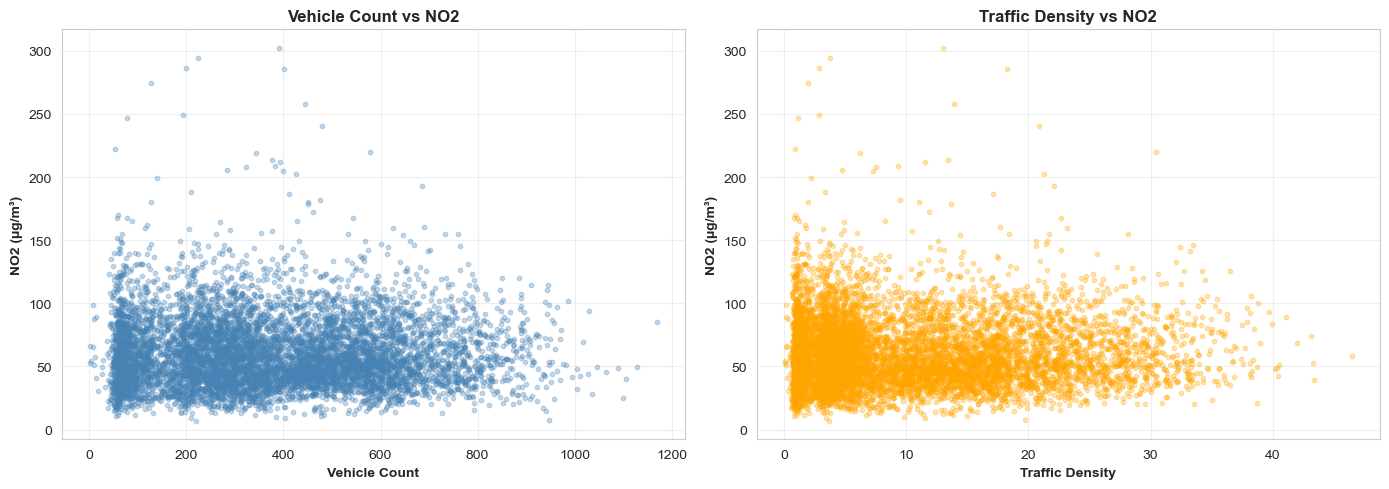

  Saved: 5_scatter_plots.png


In [16]:
# Visualization 5: Scatter plots
print("[5/10] Scatter plots...")
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].scatter(df['NUMBER_OF_VEHICLES'], df['Concentration_NO2'], 
                alpha=0.3, s=10, color='steelblue')
axes[0].set_xlabel('Vehicle Count', fontweight='bold')
axes[0].set_ylabel('NO2 (µg/m³)', fontweight='bold')
axes[0].set_title('Vehicle Count vs NO2', fontweight='bold')
axes[0].grid(True, alpha=0.3)

if 'traffic_density' in df.columns:
    axes[1].scatter(df['traffic_density'], df['Concentration_NO2'], 
                    alpha=0.3, s=10, color='orange')
    axes[1].set_xlabel('Traffic Density', fontweight='bold')
    axes[1].set_ylabel('NO2 (µg/m³)', fontweight='bold')
    axes[1].set_title('Traffic Density vs NO2', fontweight='bold')
    axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig(os.path.join(vis_dir, '5_scatter_plots.png'), dpi=300, bbox_inches='tight')
plt.show()
print("  Saved: 5_scatter_plots.png")

[6/10] Distribution histograms...


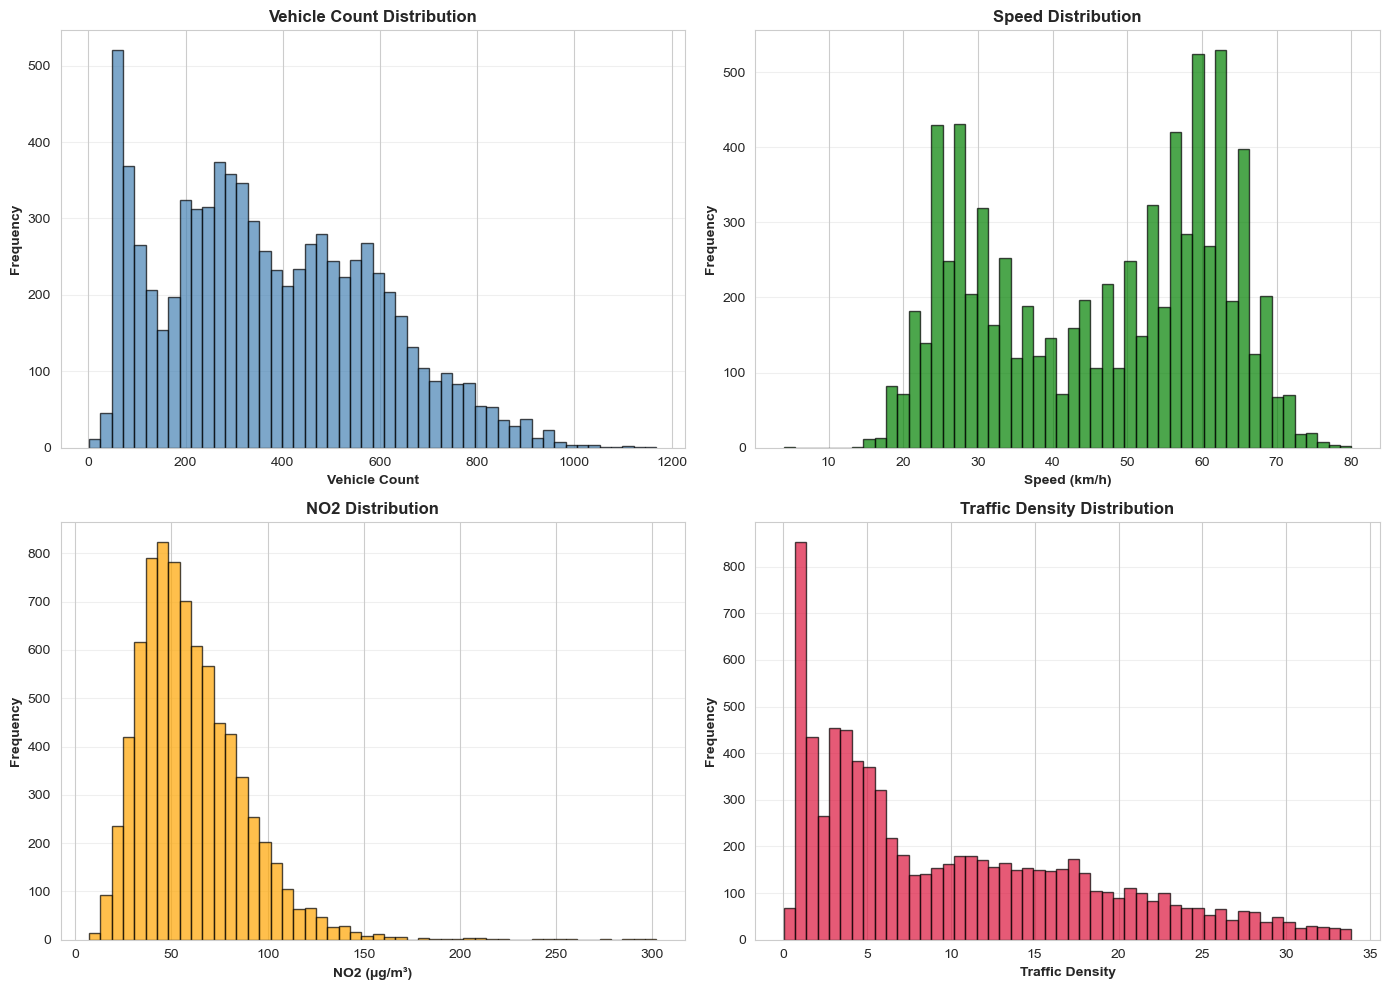

  Saved: 6_distributions.png


In [17]:
# Visualization 6: Distributions
print("[6/10] Distribution histograms...")
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

axes[0, 0].hist(df['NUMBER_OF_VEHICLES'].dropna(), bins=50, color='steelblue', alpha=0.7, edgecolor='black')
axes[0, 0].set_xlabel('Vehicle Count', fontweight='bold')
axes[0, 0].set_ylabel('Frequency', fontweight='bold')
axes[0, 0].set_title('Vehicle Count Distribution', fontweight='bold')
axes[0, 0].grid(axis='y', alpha=0.3)

axes[0, 1].hist(df['AVERAGE_SPEED'].dropna(), bins=50, color='green', alpha=0.7, edgecolor='black')
axes[0, 1].set_xlabel('Speed (km/h)', fontweight='bold')
axes[0, 1].set_ylabel('Frequency', fontweight='bold')
axes[0, 1].set_title('Speed Distribution', fontweight='bold')
axes[0, 1].grid(axis='y', alpha=0.3)

axes[1, 0].hist(df['Concentration_NO2'].dropna(), bins=50, color='orange', alpha=0.7, edgecolor='black')
axes[1, 0].set_xlabel('NO2 (µg/m³)', fontweight='bold')
axes[1, 0].set_ylabel('Frequency', fontweight='bold')
axes[1, 0].set_title('NO2 Distribution', fontweight='bold')
axes[1, 0].grid(axis='y', alpha=0.3)

if 'traffic_density' in df.columns:
    density_clean = df['traffic_density'][df['traffic_density'] < df['traffic_density'].quantile(0.99)]
    axes[1, 1].hist(density_clean.dropna(), bins=50, color='crimson', alpha=0.7, edgecolor='black')
    axes[1, 1].set_xlabel('Traffic Density', fontweight='bold')
    axes[1, 1].set_ylabel('Frequency', fontweight='bold')
    axes[1, 1].set_title('Traffic Density Distribution', fontweight='bold')
    axes[1, 1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig(os.path.join(vis_dir, '6_distributions.png'), dpi=300, bbox_inches='tight')
plt.show()
print("  Saved: 6_distributions.png")

[7/10] Monthly trends...


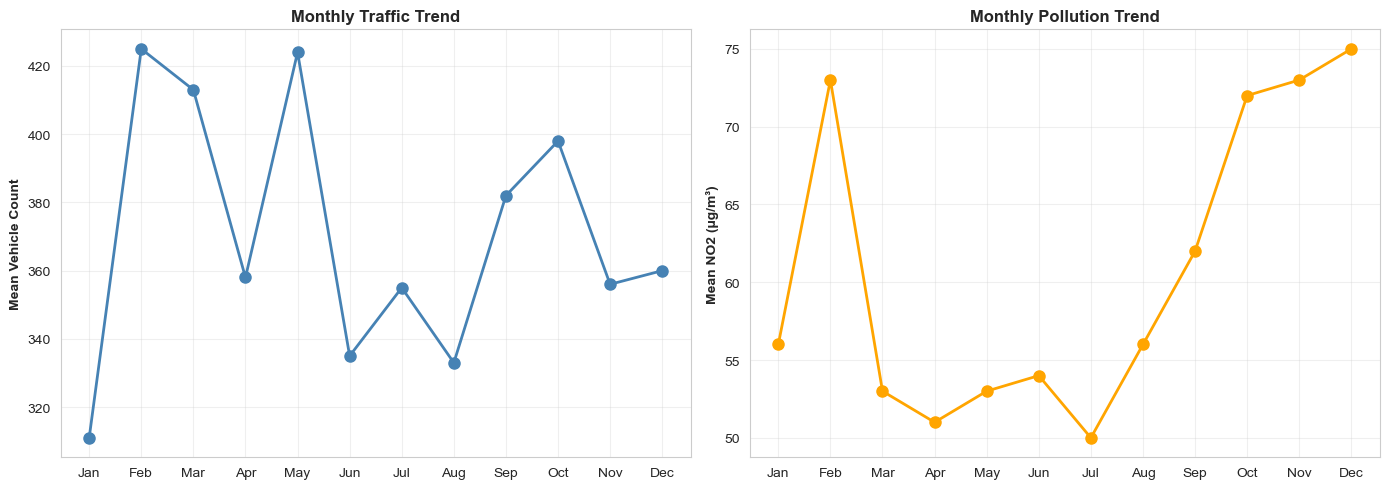

  Saved: 7_monthly_trends.png


In [18]:
# Visualization 7: Monthly trends
print("[7/10] Monthly trends...")
monthly = df.groupby('month').agg({
    'NUMBER_OF_VEHICLES': 'mean',
    'Concentration_NO2': 'mean'
}).round(0)

month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
               'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].plot(monthly.index, monthly['NUMBER_OF_VEHICLES'], marker='o', linewidth=2, markersize=8, color='steelblue')
axes[0].set_xticks(range(1, 13))
axes[0].set_xticklabels(month_names)
axes[0].set_ylabel('Mean Vehicle Count', fontweight='bold')
axes[0].set_title('Monthly Traffic Trend', fontweight='bold')
axes[0].grid(True, alpha=0.3)

axes[1].plot(monthly.index, monthly['Concentration_NO2'], marker='o', linewidth=2, markersize=8, color='orange')
axes[1].set_xticks(range(1, 13))
axes[1].set_xticklabels(month_names)
axes[1].set_ylabel('Mean NO2 (µg/m³)', fontweight='bold')
axes[1].set_title('Monthly Pollution Trend', fontweight='bold')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig(os.path.join(vis_dir, '7_monthly_trends.png'), dpi=300, bbox_inches='tight')
plt.show()
print("  Saved: 7_monthly_trends.png")

[8/10] Lag correlation analysis...


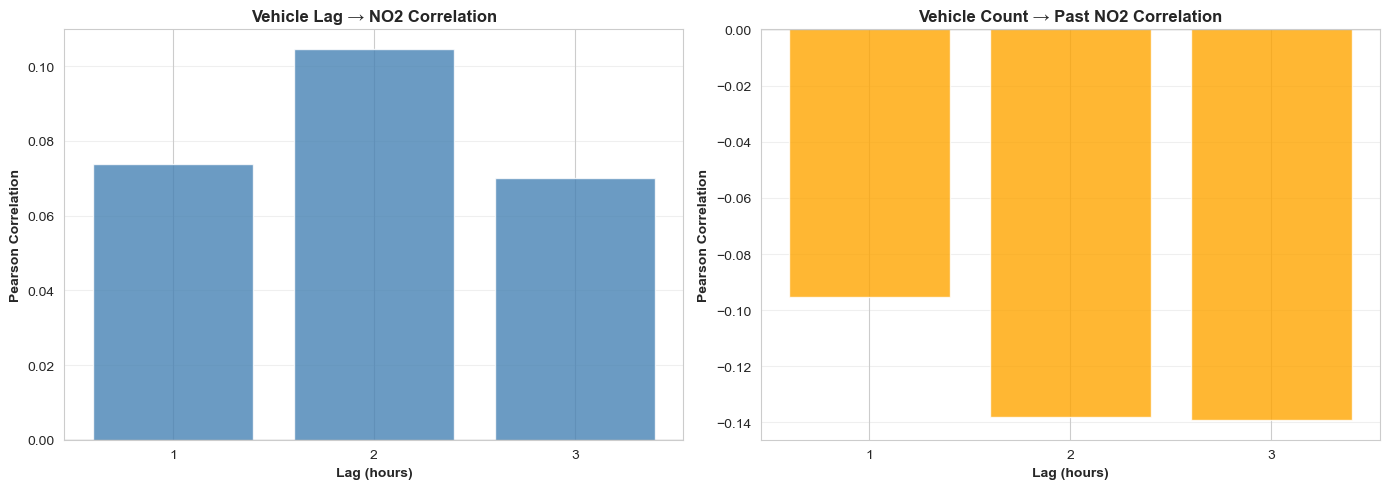

  Saved: 8_lag_analysis.png


In [19]:
# Visualization 8: Lag analysis
print("[8/10] Lag correlation analysis...")
if 'vehicles_lag1' in df.columns and 'no2_lag1' in df.columns:
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))
    
    # Vehicle lags
    lag_corrs_veh = []
    for lag in [1, 2, 3]:
        temp = df[[f'vehicles_lag{lag}', 'Concentration_NO2']].dropna()
        if len(temp) > 30:
            r, _ = stats.pearsonr(temp[f'vehicles_lag{lag}'], temp['Concentration_NO2'])
            lag_corrs_veh.append(r)
    
    axes[0].bar([1, 2, 3], lag_corrs_veh, color='steelblue', alpha=0.8)
    axes[0].axhline(y=0, color='black', linestyle='-', linewidth=0.8)
    axes[0].set_xlabel('Lag (hours)', fontweight='bold')
    axes[0].set_ylabel('Pearson Correlation', fontweight='bold')
    axes[0].set_title('Vehicle Lag → NO2 Correlation', fontweight='bold')
    axes[0].set_xticks([1, 2, 3])
    axes[0].grid(axis='y', alpha=0.3)
    
    # NO2 lags
    lag_corrs_no2 = []
    for lag in [1, 2, 3]:
        temp = df[['NUMBER_OF_VEHICLES', f'no2_lag{lag}']].dropna()
        if len(temp) > 30:
            r, _ = stats.pearsonr(temp['NUMBER_OF_VEHICLES'], temp[f'no2_lag{lag}'])
            lag_corrs_no2.append(r)
    
    axes[1].bar([1, 2, 3], lag_corrs_no2, color='orange', alpha=0.8)
    axes[1].axhline(y=0, color='black', linestyle='-', linewidth=0.8)
    axes[1].set_xlabel('Lag (hours)', fontweight='bold')
    axes[1].set_ylabel('Pearson Correlation', fontweight='bold')
    axes[1].set_title('Vehicle Count → Past NO2 Correlation', fontweight='bold')
    axes[1].set_xticks([1, 2, 3])
    axes[1].grid(axis='y', alpha=0.3)
    
    plt.tight_layout()
    plt.savefig(os.path.join(vis_dir, '8_lag_analysis.png'), dpi=300, bbox_inches='tight')
    plt.show()
    print("  Saved: 8_lag_analysis.png")


[9/10] Categorical variable analysis...


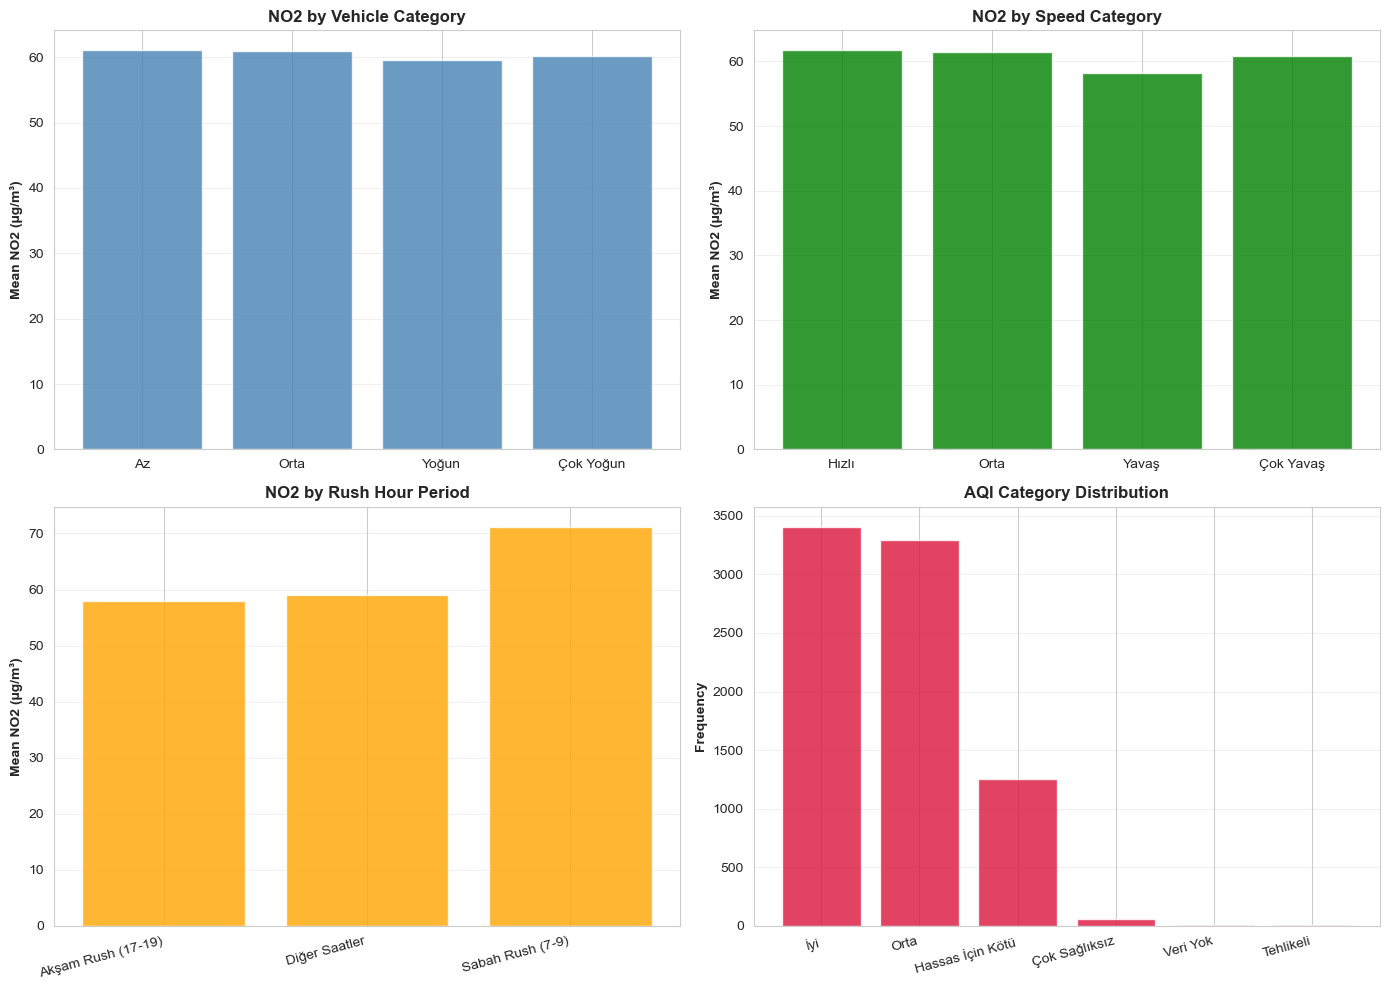

  Saved: 9_categorical_analysis.png


In [20]:
# Visualization 9: Categorical analysis
print("[9/10] Categorical variable analysis...")
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Vehicle category
if 'vehicle_category' in df.columns:
    cat_data = df.groupby('vehicle_category')['Concentration_NO2'].mean().sort_index()
    axes[0, 0].bar(range(len(cat_data)), cat_data.values, color='steelblue', alpha=0.8)
    axes[0, 0].set_xticks(range(len(cat_data)))
    axes[0, 0].set_xticklabels(cat_data.index, rotation=0)
    axes[0, 0].set_ylabel('Mean NO2 (µg/m³)', fontweight='bold')
    axes[0, 0].set_title('NO2 by Vehicle Category', fontweight='bold')
    axes[0, 0].grid(axis='y', alpha=0.3)

# Speed category
if 'speed_category' in df.columns:
    speed_cats = sorted(df['speed_category'].dropna().unique(), key=str)
    cat_means = [df[df['speed_category'] == cat]['Concentration_NO2'].mean() for cat in speed_cats]
    axes[0, 1].bar(range(len(speed_cats)), cat_means, color='green', alpha=0.8)
    axes[0, 1].set_xticks(range(len(speed_cats)))
    axes[0, 1].set_xticklabels(speed_cats, rotation=0)
    axes[0, 1].set_ylabel('Mean NO2 (µg/m³)', fontweight='bold')
    axes[0, 1].set_title('NO2 by Speed Category', fontweight='bold')
    axes[0, 1].grid(axis='y', alpha=0.3)

# Rush hour
if 'rush_hour' in df.columns:
    rush_data = df.groupby('rush_hour')['Concentration_NO2'].mean()
    axes[1, 0].bar(range(len(rush_data)), rush_data.values, color='orange', alpha=0.8)
    axes[1, 0].set_xticks(range(len(rush_data)))
    axes[1, 0].set_xticklabels(rush_data.index, rotation=15, ha='right')
    axes[1, 0].set_ylabel('Mean NO2 (µg/m³)', fontweight='bold')
    axes[1, 0].set_title('NO2 by Rush Hour Period', fontweight='bold')
    axes[1, 0].grid(axis='y', alpha=0.3)

# AQI Category
if 'AQI_Category' in df.columns:
    aqi_counts = df['AQI_Category'].value_counts().head(6)
    axes[1, 1].bar(range(len(aqi_counts)), aqi_counts.values, color='crimson', alpha=0.8)
    axes[1, 1].set_xticks(range(len(aqi_counts)))
    axes[1, 1].set_xticklabels(aqi_counts.index, rotation=15, ha='right')
    axes[1, 1].set_ylabel('Frequency', fontweight='bold')
    axes[1, 1].set_title('AQI Category Distribution', fontweight='bold')
    axes[1, 1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig(os.path.join(vis_dir, '9_categorical_analysis.png'), dpi=300, bbox_inches='tight')
plt.show()
print("  Saved: 9_categorical_analysis.png")

[10/10] Seasonal patterns...


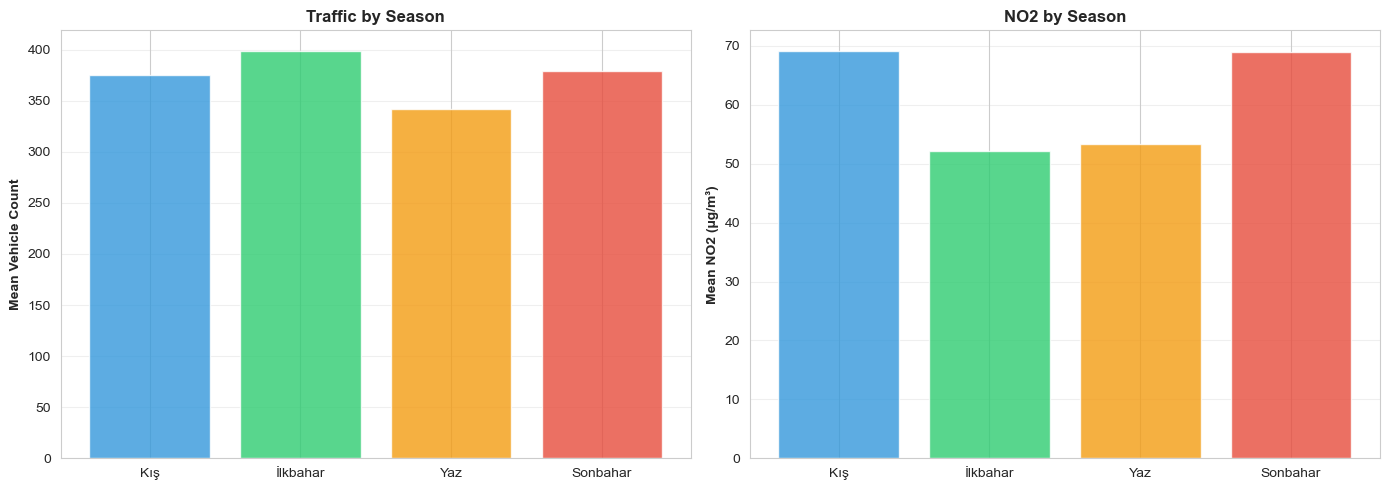

  Saved: 10_seasonal_analysis.png


In [21]:
# Visualization 10: Seasonal analysis
print("[10/10] Seasonal patterns...")
if 'season' in df.columns:
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))
    
    # Traffic by season
    season_order = ['Kış', 'İlkbahar', 'Yaz', 'Sonbahar']
    season_traffic = [df[df['season'] == s]['NUMBER_OF_VEHICLES'].mean() for s in season_order]
    axes[0].bar(season_order, season_traffic, color=['#3498db', '#2ecc71', '#f39c12', '#e74c3c'], alpha=0.8)
    axes[0].set_ylabel('Mean Vehicle Count', fontweight='bold')
    axes[0].set_title('Traffic by Season', fontweight='bold')
    axes[0].grid(axis='y', alpha=0.3)
    
    # NO2 by season
    season_no2 = [df[df['season'] == s]['Concentration_NO2'].mean() for s in season_order]
    axes[1].bar(season_order, season_no2, color=['#3498db', '#2ecc71', '#f39c12', '#e74c3c'], alpha=0.8)
    axes[1].set_ylabel('Mean NO2 (µg/m³)', fontweight='bold')
    axes[1].set_title('NO2 by Season', fontweight='bold')
    axes[1].grid(axis='y', alpha=0.3)
    
    plt.tight_layout()
    plt.savefig(os.path.join(vis_dir, '10_seasonal_analysis.png'), dpi=300, bbox_inches='tight')
    plt.show()
    print("  Saved: 10_seasonal_analysis.png")

In [22]:
# =============================================================================
# SUMMARY
# =============================================================================

print("\n" + "="*80)
print("EDA COMPLETED SUCCESSFULLY")
print("="*80)
print(f"\nOutput Directory: {vis_dir}")
print(f"  10 visualizations generated (300 DPI)")
print(f"  All exploratory analysis complete")
print("\n" + "="*80)



EDA COMPLETED SUCCESSFULLY

Output Directory: visualizations_eda
  10 visualizations generated (300 DPI)
  All exploratory analysis complete

